In [1]:
import torch
import numpy as np
import math
import matplotlib.pyplot as plt
import IPython.display as ipd
import soundfile as sf

## Load Example Audio 

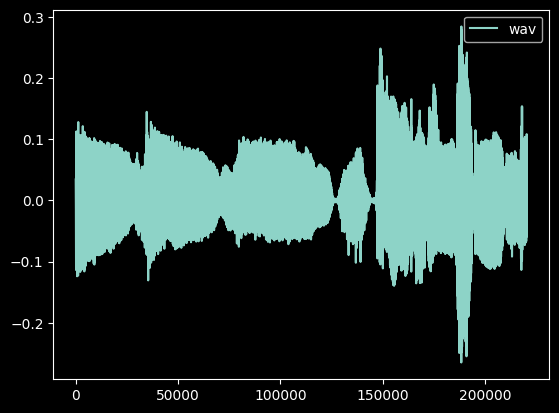

In [ ]:
AUDIO_PATH = './test.wav'
wav, sr = sf.read(AUDIO_PATH)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.legend()

## ToneStack

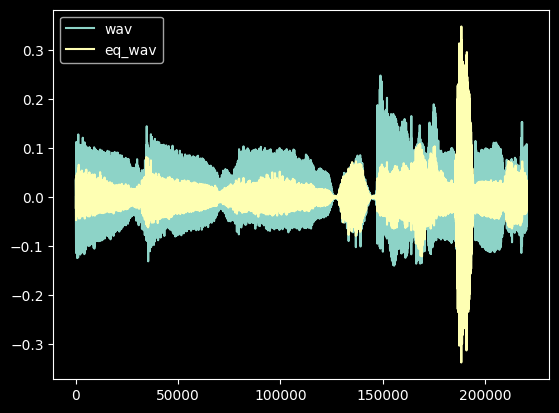

In [7]:
from diffFx_pytorch.processors.eq import Tonestack
TONE_DSP_PARAMS = {
    'bass': 1.0, 
    'mid': 0.5, 
    'treble': 0.5
}

Processor = Tonestack(sample_rate=sr, preset='IBANEZ').to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
eq_wav = Processor(test_wav, None, TONE_DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=eq_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(eq_wav.squeeze().cpu().numpy(),      label='eq_wav')
plt.legend()